In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import random

sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
#  #1D1D3D o black
sns.set(rc={'axes.facecolor':'#1D1D3D', 'figure.facecolor':'#1D1D3D'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
df = pd.read_csv("../../../data/Casos1.csv")
df['Fecha'] = pd.to_datetime(df['Fecha de diagnóstico'], format='%d/%m/%Y')
df = df.set_index('Fecha')
df

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
Fecha,,,,,,,,,
2020-03-06,1,06/03/2020,BOGOTA,Bogotá D.C.,Recuperado,19,F,Importado,ITALIA
2020-03-09,2,09/03/2020,BUGA,Valle del Cauca,Recuperado,34,M,Importado,ESPAÑA
2020-03-09,3,09/03/2020,MEDELLIN,Antioquia,Recuperado,50,F,Importado,ESPAÑA
2020-03-11,4,11/03/2020,MEDELLIN,Antioquia,Recuperado,55,M,Relacionado,COLOMBIA
2020-03-11,5,11/03/2020,MEDELLIN,Antioquia,Recuperado,25,M,Relacionado,COLOMBIA
...,...,...,...,...,...,...,...,...,...
2020-04-12,2772,12/04/2020,BOGOTA,Bogotá D.C.,Casa,55,F,En estudio,COLOMBIA
2020-04-12,2773,12/04/2020,BOGOTA,Bogotá D.C.,Hospital UCI,65,M,En estudio,COLOMBIA
2020-04-12,2774,12/04/2020,BOGOTA,Bogotá D.C.,Hospital,74,M,En estudio,COLOMBIA


In [17]:
departamentos = df['Departamento o Distrito'].unique()

array(['Bogotá D.C.', 'Valle del Cauca', 'Antioquia',
       'Cartagena D.T. y C', 'Huila', 'Meta', 'Risaralda',
       'Norte de Santander', 'Caldas', 'Cundinamarca',
       'Barranquilla D.E.', 'Santander', 'Quindío', 'Tolima', 'Cauca',
       'Santa Marta D.T. y C.', 'Cesar', 'San Andrés', 'Casanare',
       'Nariño', 'Atlántico', 'Boyacá', 'Córdoba', 'Bolívar', 'Sucre',
       'La Guajira', 'Magdalena', 'Chocó'], dtype=object)

In [4]:
#df_d = df[df['Departamento o Distrito'].str.contains(depart)]
df1 = pd.DataFrame(df['Sexo'])

df_count = df1.groupby("Fecha").count().rename(columns={"Sexo":"cuenta"}).reset_index()
df_count = df_count.reset_index(drop="True")
df_count['País'] = df_count['cuenta'].cumsum()
df_count['Día'] = df_count.index+1
df_count = df_count.drop(['cuenta'], axis=1).set_index('Fecha')
df_count

,País,Día
Fecha,,
2020-03-06,1,1
2020-03-09,3,2
2020-03-11,9,3
2020-03-12,13,4
2020-03-13,16,5
2020-03-14,24,6
2020-03-15,45,7
2020-03-16,57,8
2020-03-17,75,9


In [5]:
def get_df_dep(depart):
    df_d = df[df['Departamento o Distrito'].str.contains(depart)]
    df1 = pd.DataFrame(df_d['Sexo'])
    
    df_count = df1.groupby("Fecha").count().rename(columns={"Sexo":"cuenta"}).reset_index()
    df_count = df_count.reset_index(drop="True")
    df_count[depart] = df_count['cuenta'].cumsum()
    df_count = df_count.drop(['cuenta'], axis=1).set_index('Fecha')
    
    return df_count

In [20]:
df_t = df_count
for d in departamentos[0:4]:
    df_aux = get_df_dep(d)
    df_t = pd.concat([df_t, df_aux], axis=1)
    df_t = df_t.fillna(method='ffill').fillna(0)
df_t = df_t.set_index('Día')

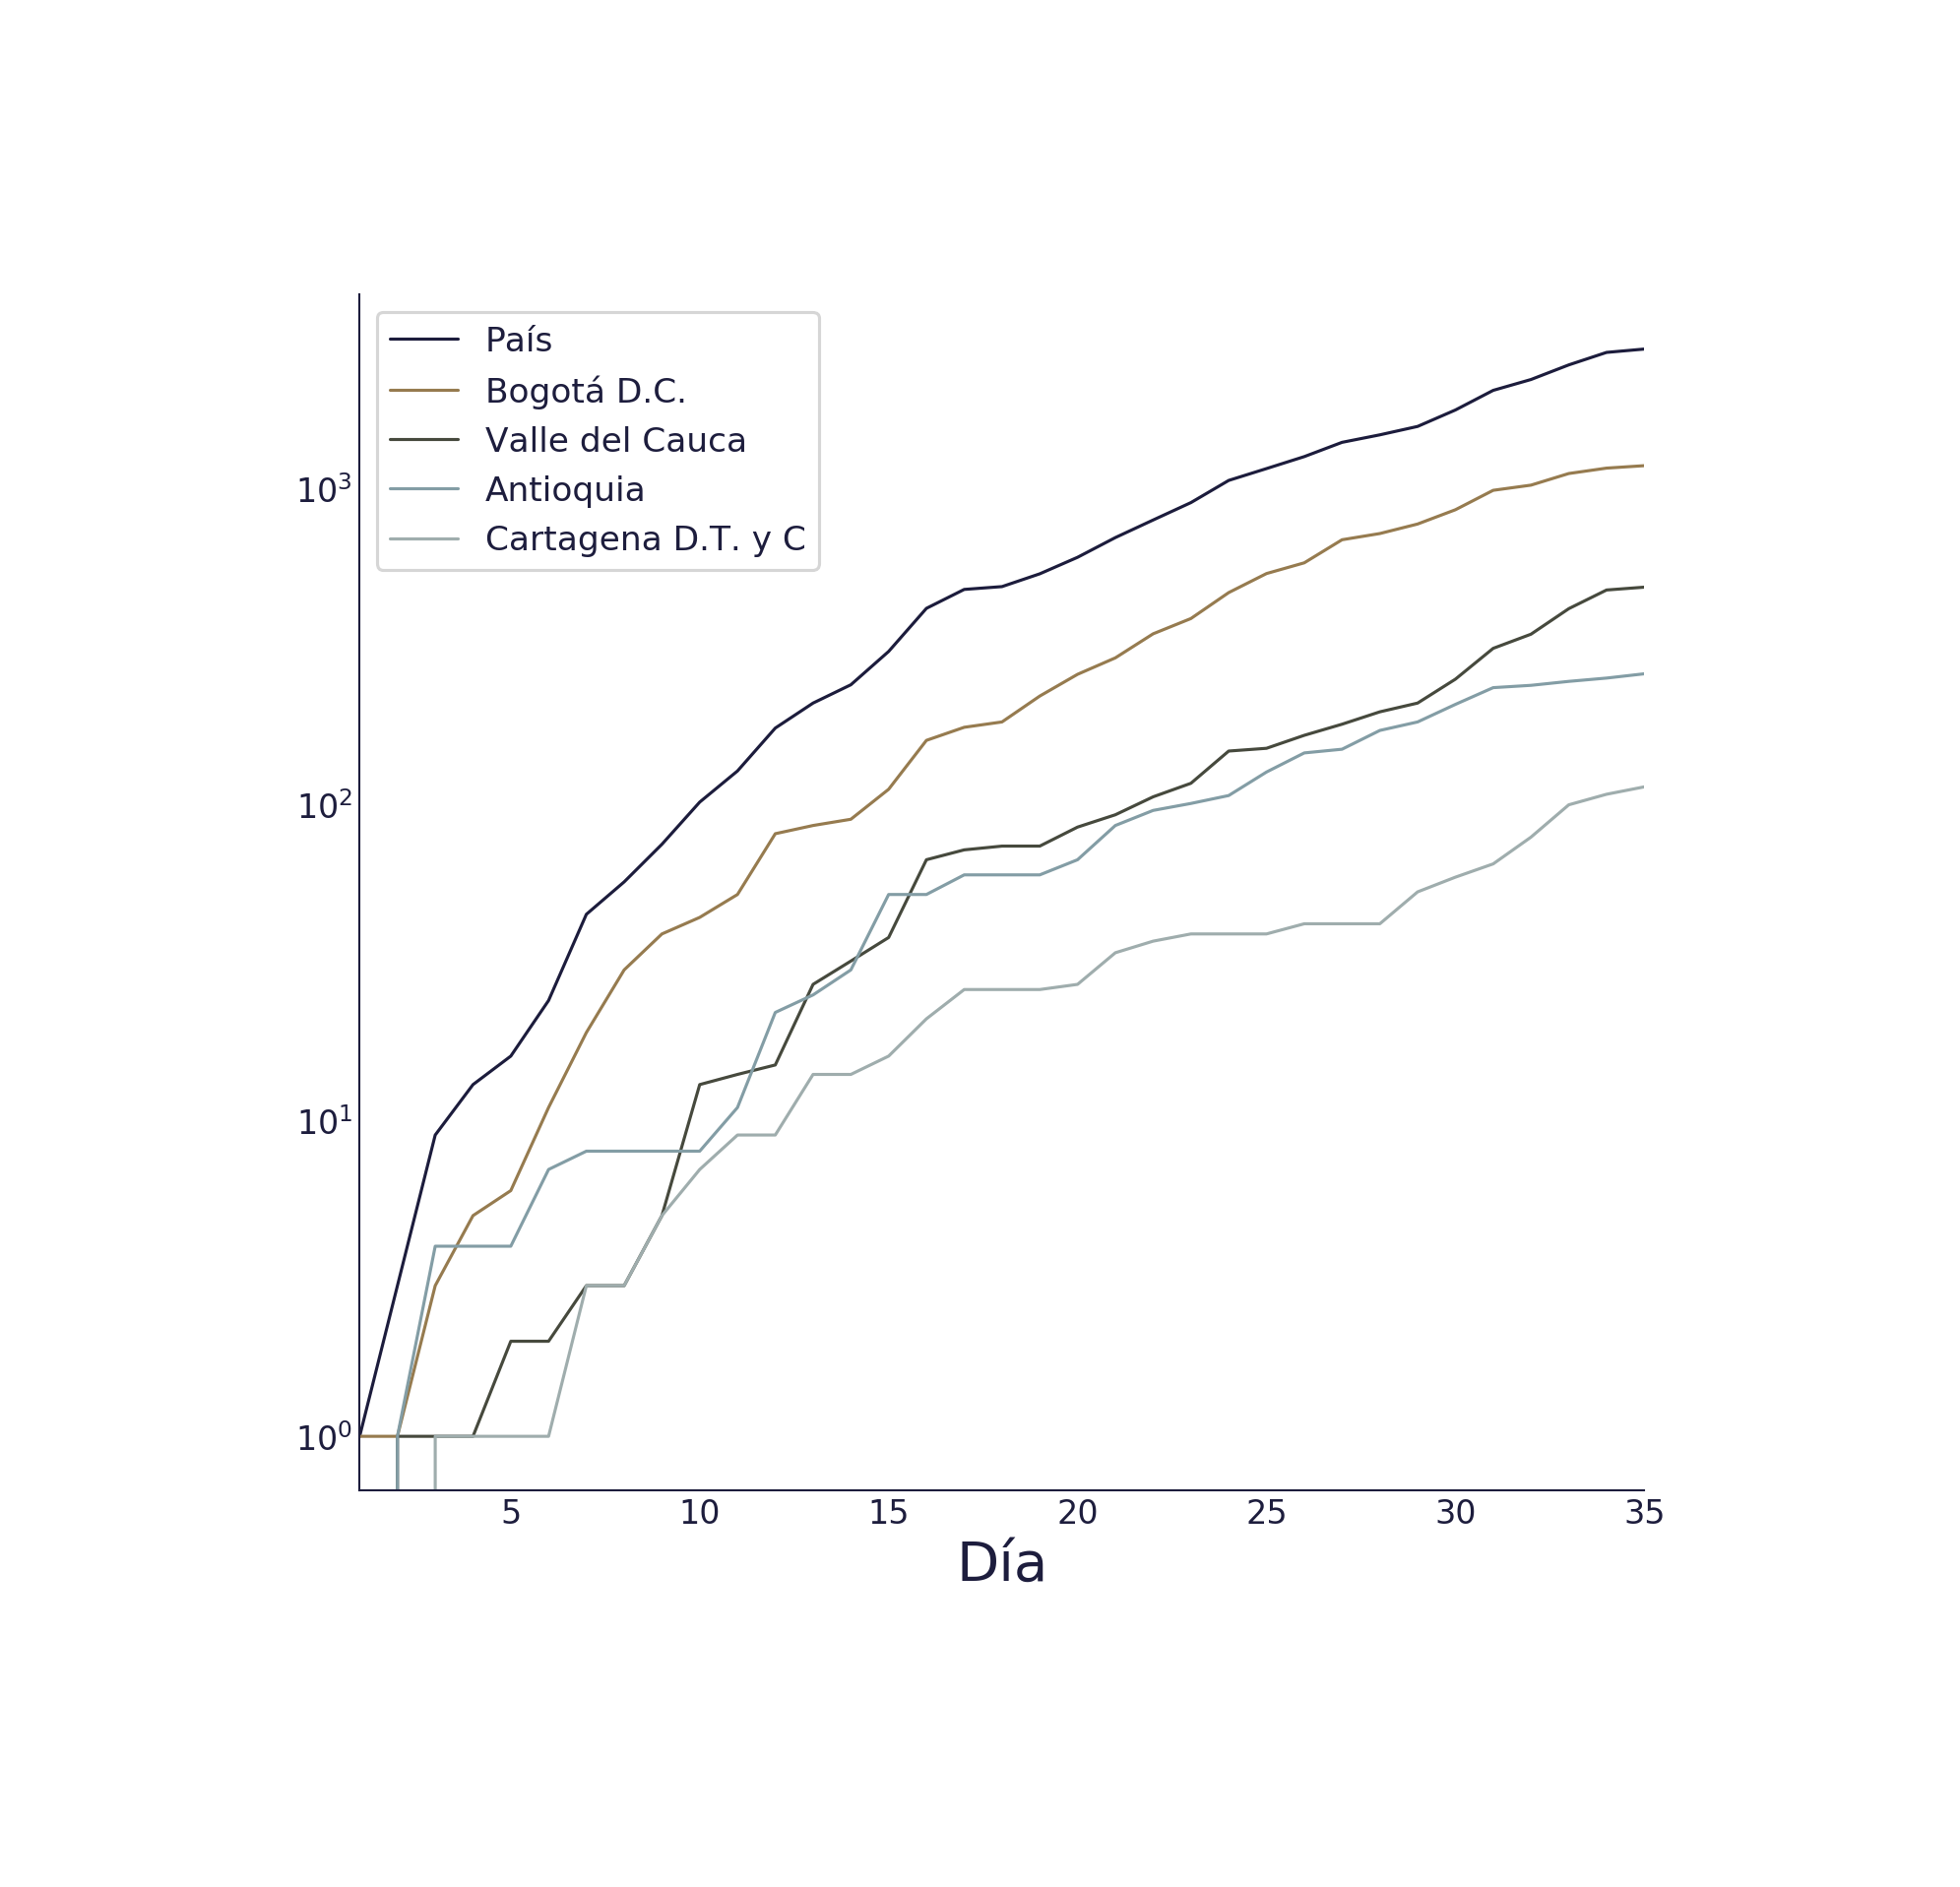

In [23]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1C1C3C",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]
df_t.plot(logy=True)#, legend=False)
plt.show()